### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### Load and Explore Dataset

In [2]:
# Load the dataset
california_housing = fetch_california_housing()

# Select the features (only AveRooms for simplicity)
X = california_housing.data[:, 3].reshape(-1, 1)  # Column 3 is AveRooms
y = california_housing.target

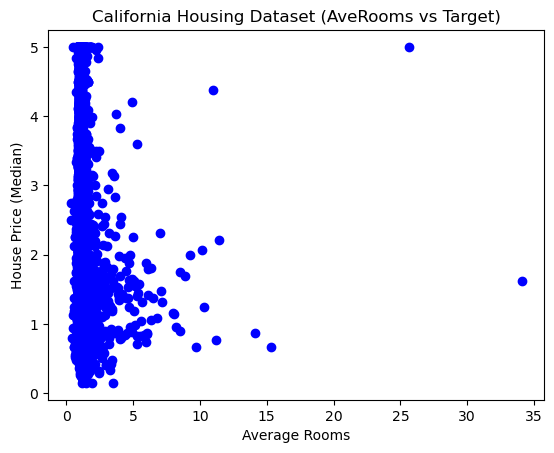

In [3]:
# Plot the data to visualize
plt.scatter(X, y, color='blue')
plt.title("California Housing Dataset (AveRooms vs Target)")
plt.xlabel("Average Rooms")
plt.ylabel("House Price (Median)")
plt.show()

### Split the Data into Training and Testing data

In [4]:
X.shape

(20640, 1)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.2, random_state=42)

### Apply Polynomial Features

In [6]:
# Apply Polynomial Features (degree 2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fit a linear regression model to the transformed data
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

### Make Predictions and Evaluate the model

In [7]:
# Transform the test data and make predictions
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.3464201208174533
R-squared: -0.027480842374031367


### Plot the Polynomial Regression Line

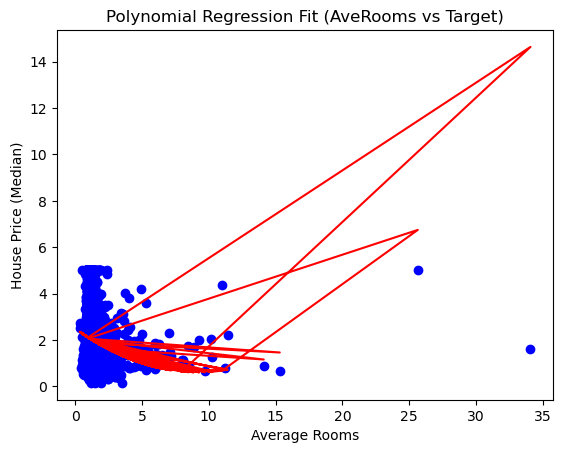

In [9]:
# Plot the original data and the polynomial regression line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(poly.transform(X)), color='red')
plt.title("Polynomial Regression Fit (AveRooms vs Target)")
plt.xlabel("Average Rooms")
plt.ylabel("House Price (Median)")
plt.show()